In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci

norm of solution for 20 steps per loop: 2.0342045473328072e+27
norm of solution for 40 steps per loop: 5.6708604003095405e+54
norm of solution for 80 steps per loop: 1.2754284744795856e+110


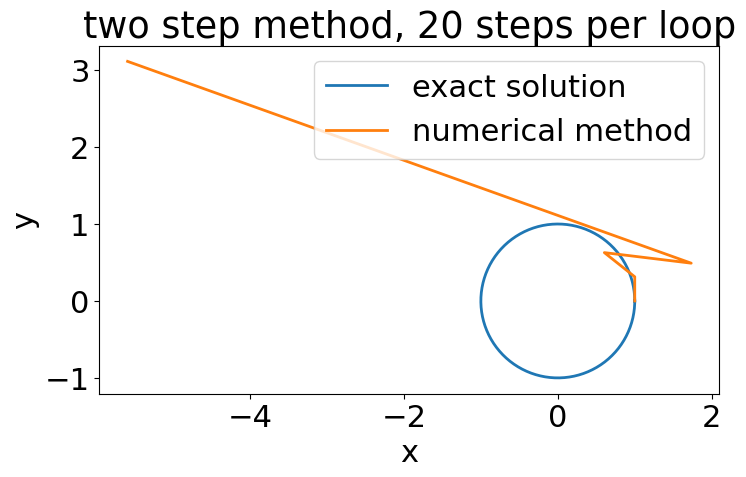

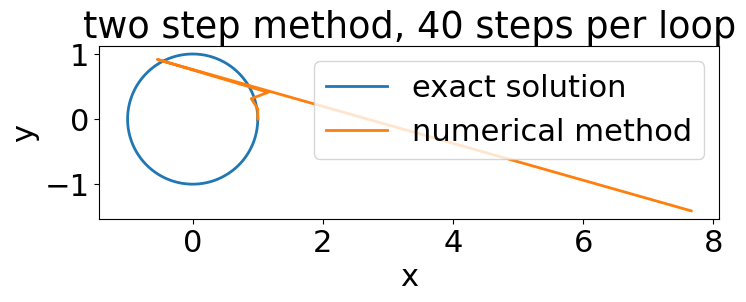

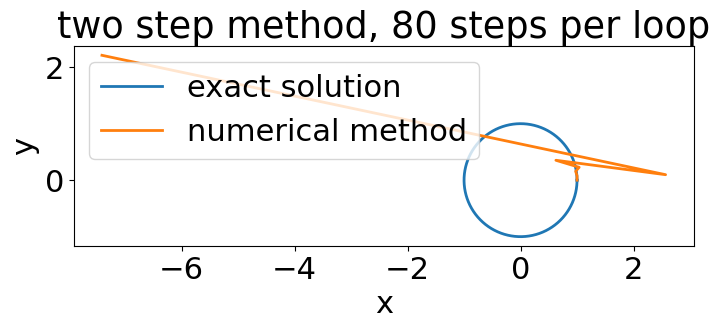

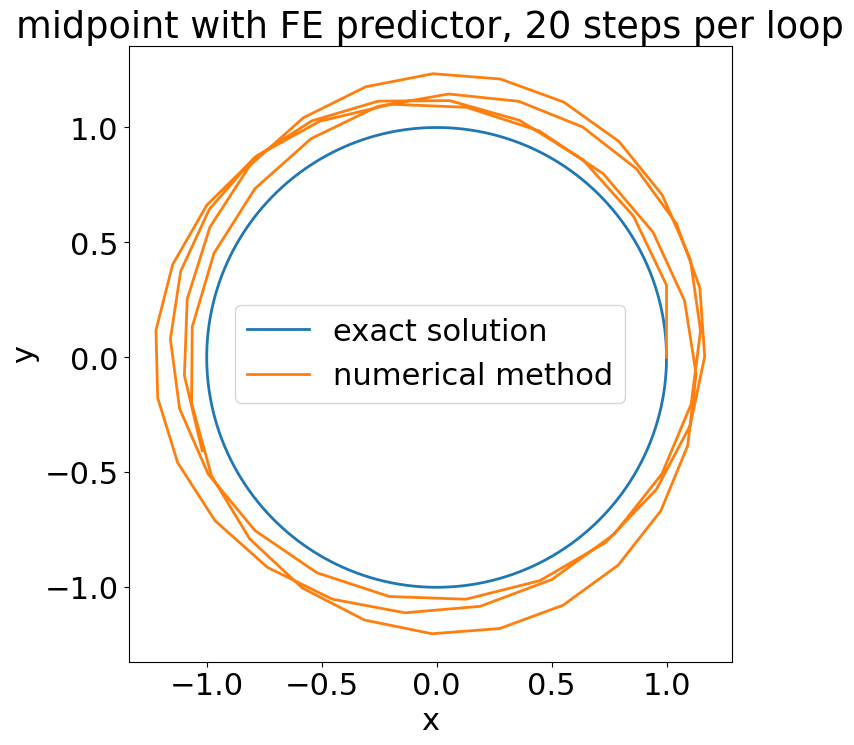

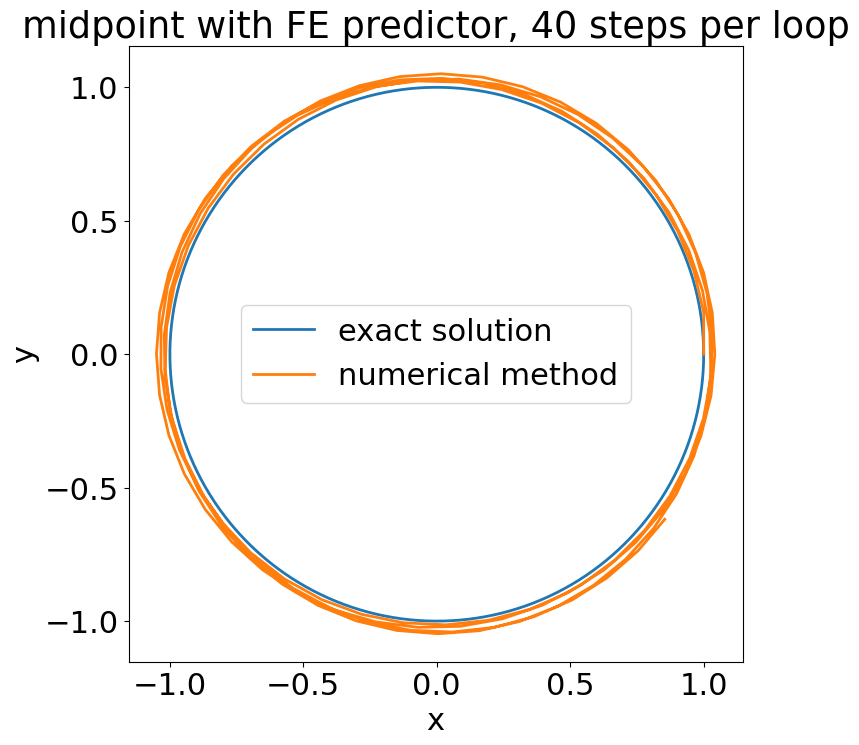

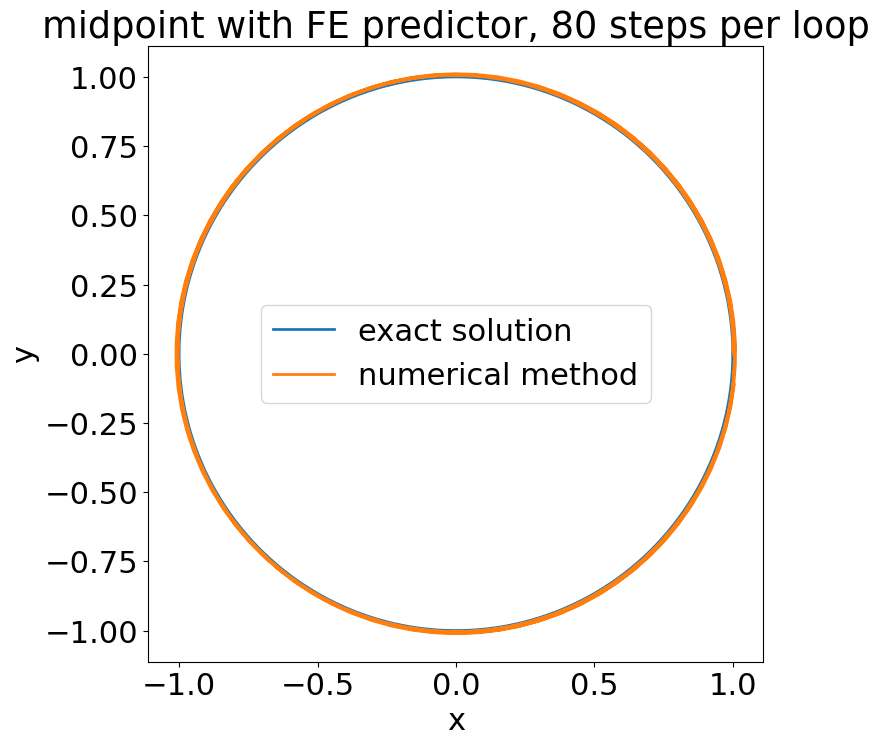

In [10]:
def f(t,y):
    # The right-hand side for the 2D gravity ODE
    dy = np.zeros((4,))
    dy[0] = y[2]
    dy[1] = y[3]
    aux = y[0]*y[0]+y[1]*y[1]
    dy[2] = -y[0]/aux
    dy[3] = -y[1]/aux
    return dy

# initial condition for the unit circle solution
y0 = np.array([1,0,0,1])

# for the exact solution
tt = np.linspace(0,2*np.pi,200)

# period 4pi, iterate using two step method
Nloops = 2
tmax = Nloops*2*np.pi
for steps_per_loop in [20,40,80]:
    Nt = Nloops*steps_per_loop
    dt = 2*np.pi/steps_per_loop  
    sol = np.zeros((Nt+2,4))
    t = 0
    sol[0] = y0 # initial condition
    sol[1] = sol[0] + dt*f(t,sol[0]) # use forward euler to estimate u_1 since method is 2 steps
    for j in range(Nt):
        j += 1
        sol[j+1] = -4*sol[j] + 5*sol[j-1] + dt*(4*f(t,sol[j])+2*f(t-dt,sol[j-1])) # two step method
        t = t + dt
    print("norm of solution for",steps_per_loop,"steps per loop:",np.linalg.norm(sol[Nt+1]))
    select = [True if np.linalg.norm(y[:2])<=10 else False for y in sol]
    sol_trunc = sol[select]
    # plot the exact and computed solution (only the points with norm((x,y))<=10 to keep the exact solution visible)
    plt.rcParams.update({'font.size': 22})
    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='exact solution')
    plt.plot(sol_trunc[:,0],sol_trunc[:,1],linewidth=2,label='numerical method')  
    plt.title("two step method, "+str(steps_per_loop)+" steps per loop")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_aspect(1)
    plt.plot()

# period 8pi, iterate using midpoint rule with FE predictor
Nloops = 4
tmax = Nloops*2*np.pi
for steps_per_loop in [20,40,80]:
    Nt = Nloops*steps_per_loop
    dt = 2*np.pi/steps_per_loop  
    sol = np.zeros((Nt+2,4))
    t = 0
    sol[0] = y0 # initial condition
    sol[1] = sol[0] + dt*f(t,sol[0]) # use forward euler to estimate u_1 since method is 2 steps
    for j in range(Nt):
        j += 1
        sol[j+1] = sol[j] + dt*f(t+dt/2,sol[j]+dt/2*f(t,sol[j])) # midpoint rule with FE predictor
        t = t + dt
    select = [True if np.linalg.norm(y[:2])<=10 else False for y in sol]
    sol_trunc = sol[select]
    # plot the exact and computed solution (only the points with norm((x,y))<=10 to keep the exact solution visible)
    plt.rcParams.update({'font.size': 22})
    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='exact solution')
    plt.plot(sol_trunc[:,0],sol_trunc[:,1],linewidth=2,label='numerical method')  
    plt.title("midpoint with FE predictor, "+str(steps_per_loop)+" steps per loop")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_aspect(1)
    plt.plot()